<a href="https://colab.research.google.com/github/amoghpai17/Bike_sharing_demand_prediction/blob/main/Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike_sharing_demand_prediction**



##### **Project Type**    - **Regression**
##### **Contribution**    - **Individual**
##### **Name - Amogh Pai**


# **Project Summary -**

The given dataset appears to be clean, as there are no null values present. Analysis of the data reveals several interesting insights.

Firstly, the probability of renting a bike is higher in the evening compared to other times of the day. This suggests that people may be using bikes for commuting to and from work. Secondly, the summer season has the highest demand for bike rentals, which is not surprising since it is a popular time for outdoor activities.

Thirdly, bike rentals are more common on non-holidays than holidays. This suggests that people may be using bikes for their daily routines and errands, rather than for leisure activities. Additionally, bikes are rented only on functioning days, indicating that the bikes are mainly used for commuting purposes.

The dataset also shows that the bike rentals are highest between May and August, with a sudden hike in October. This could be due to special events or festivals occurring during that time. The first weekend has a peak in bike rentals, and then it remains stable. This suggests that people may be using bikes for leisure activities on weekends.

Finally, there is a linear growth in bike rentals over the years, indicating that the bike rental business is growing steadily. To further understand the trends, three machine learning models were built, including Linear Regression, K-Nearest Neighbor Regressor, and Random Forest Regressor. Among these models, Random Forest Regressor performed the best with an r2 score of 0.829. This model can be used to predict future bike rental demand accurately.

In conclusion, the bike rental business appears to be doing well, with steady growth over the years. The demand for bikes is highest in the summer season, on functioning days, and on non-holidays. The Random Forest Regressor model can be used to predict future bike rental demand accurately, helping the business to plan for future growth and profitability.

# **GitHub Link -**

https://github.com/amoghpai17/Bike_sharing_demand_prediction

# **Problem Statement**


### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [150]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import uniform
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

### Dataset Loading

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Bike sharing Demand prediction/SeoulBikeData.csv', encoding= 'unicode_escape')

### Dataset First View

In [153]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [154]:
# Dataset Rows & Columns count
rows = df.shape[0]
columns = df.shape[1]
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 8760 rows and 14 columns.


### Dataset Information

In [155]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [156]:
# Dataset Duplicate Value Count
mask = df.duplicated()
duplicate_count = mask.sum()
print(f'The dataset has {duplicate_count} duplicate rows.')

The dataset has 0 duplicate rows.


#### Missing Values/Null Values

In [157]:
# Missing Values/Null Values Count
df.isnull().values.sum()

0

<AxesSubplot:>

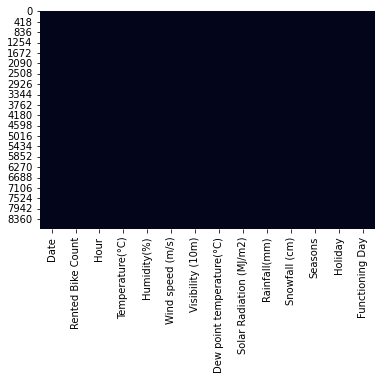

In [158]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset contains 8760 rows and 14 columns.

The dataset has no null values and no Duplicate values. 

The datatypes of features are object,int and float. 

## ***2. Understanding Your Variables***

In [159]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [160]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [161]:
# Check Unique Values for each variable.
for col in df.columns:
    unique_values = df[col].nunique()
    print(col, unique_values)

Date 365
Rented Bike Count 2166
Hour 24
Temperature(°C) 546
Humidity(%) 90
Wind speed (m/s) 65
Visibility (10m) 1789
Dew point temperature(°C) 556
Solar Radiation (MJ/m2) 345
Rainfall(mm) 61
Snowfall (cm) 51
Seasons 4
Holiday 2
Functioning Day 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [162]:
# Write your code to make your dataset analysis ready.
#appending the dependent variable at last for convineance
column=df['Rented Bike Count']
df.drop('Rented Bike Count',1,inplace=True)
df['Rented Bike Count']=column

In [163]:
#grouping required variables for visualization purpose
groupedvalues = df.groupby('Hour').sum().reset_index()
groupedvalues.rename(columns={'Rented Bike Count':'RBC'},inplace=True)
groupedvalues.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),RBC
0,0,4119.5,23724,530.6,523184,1658.2,0.0,53.0,22.5,197633
1,1,3987.0,24137,468.7,516407,1631.9,0.0,22.7,26.9,155557
2,2,3865.9,24567,446.7,504648,1620.2,0.0,35.4,27.9,110095
3,3,3757.2,24870,437.1,495902,1607.0,0.0,53.6,28.0,74216
4,4,3659.6,25087,444.3,488839,1572.5,0.0,56.8,27.9,48396


In [164]:
#grouping required variables for visualization purpose
groupedvalues = df.groupby('Seasons').sum().reset_index()
groupedvalues.rename(columns={'Rented Bike Count':'RBC'},inplace=True)
groupedvalues.head()

,Seasons,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),RBC
0,Autumn,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,1790002
1,Spring,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,1611909
2,Summer,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,2283234
3,Winter,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,487169


In [165]:
# using datetime library to extract the year, month, day data
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count,Year,Month,Day
0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254,2017,1,12
1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204,2017,1,12
2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173,2017,1,12
3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107,2017,1,12
4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78,2017,1,12


In [166]:
#grouping required variables for visualization purpose
groupedvalues = df.groupby('Month').sum().reset_index()
groupedvalues.rename(columns={'Rented Bike Count':'RBC'},inplace=True)
groupedvalues.head()

,Month,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),RBC,Year,Day
0,1,8556,2025.8,39381,1348.9,1036252,-4909.7,264.25,90.3,186.2,287244,1501368,11904
1,2,7728,4357.5,34800,1235.4,975610,-2575.2,343.27,100.6,44.7,264112,1356072,9744
2,3,8556,8508.9,44513,1423.9,923982,2309.8,442.98,70.1,2.2,455037,1501368,11904
3,4,8280,9872.1,38614,1333.9,1037184,2296.0,528.24,107.7,0.0,556219,1452936,11160
4,5,8556,12365.5,45191,1309.0,1003308,6171.2,512.55,216.0,0.0,665948,1501368,11904


### What all manipulations have you done and insights you found?

I have done the necessary grouping for visualization purpose.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

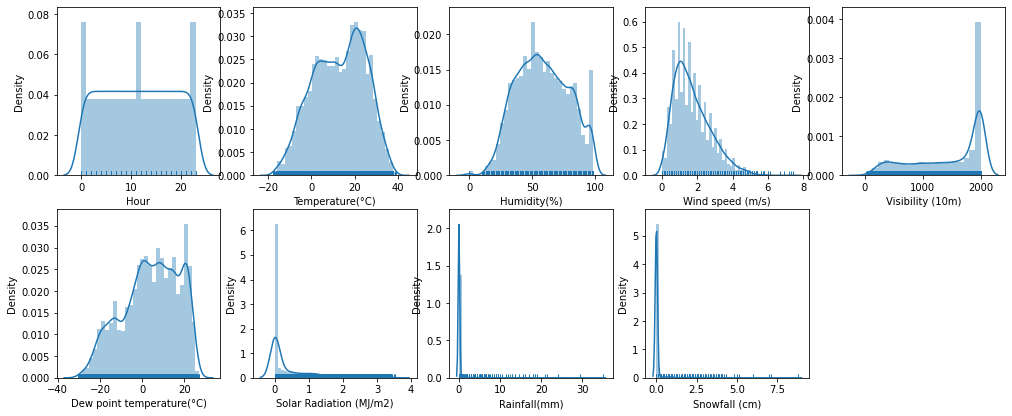

In [167]:
# Chart - 1 visualization code
col=['Hour','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
#distplots
fig = plt.figure(figsize=(17, 18))
for i in range(len(col)):
  plt.subplot(5,5,i+1)
  sns.distplot(df[col[i]], hist=True, rug=True)

##### 1. Why did you pick the specific chart?

A distribution plot, also known as a histogram, is a useful chart for exploring the distribution of a single variable. It displays the frequency of data points that fall within a set of equal ranges, or "bins." This can help reveal patterns in the data such as the presence of outliers, skewness, and the presence of multiple peaks.

##### 2. What is/are the insight(s) found from the chart?

All the charts dont have normal distribution. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Non-normal distributions can suggest the presence of outliers, skewness, or other issues that may need to be addressed before making business decisions based on the data.

Whether the gained insights will help create a positive business impact depends on the specific context of the analysis and the goals of the business. If the business is able to use the insights to identify areas for improvement or to make more informed decisions, then the impact could be positive. However, if the insights are not acted upon or if they reveal issues that cannot be easily addressed, then the impact may be negative.

#### Chart - 2

Text(0, 0.5, 'Rented Bike Count')

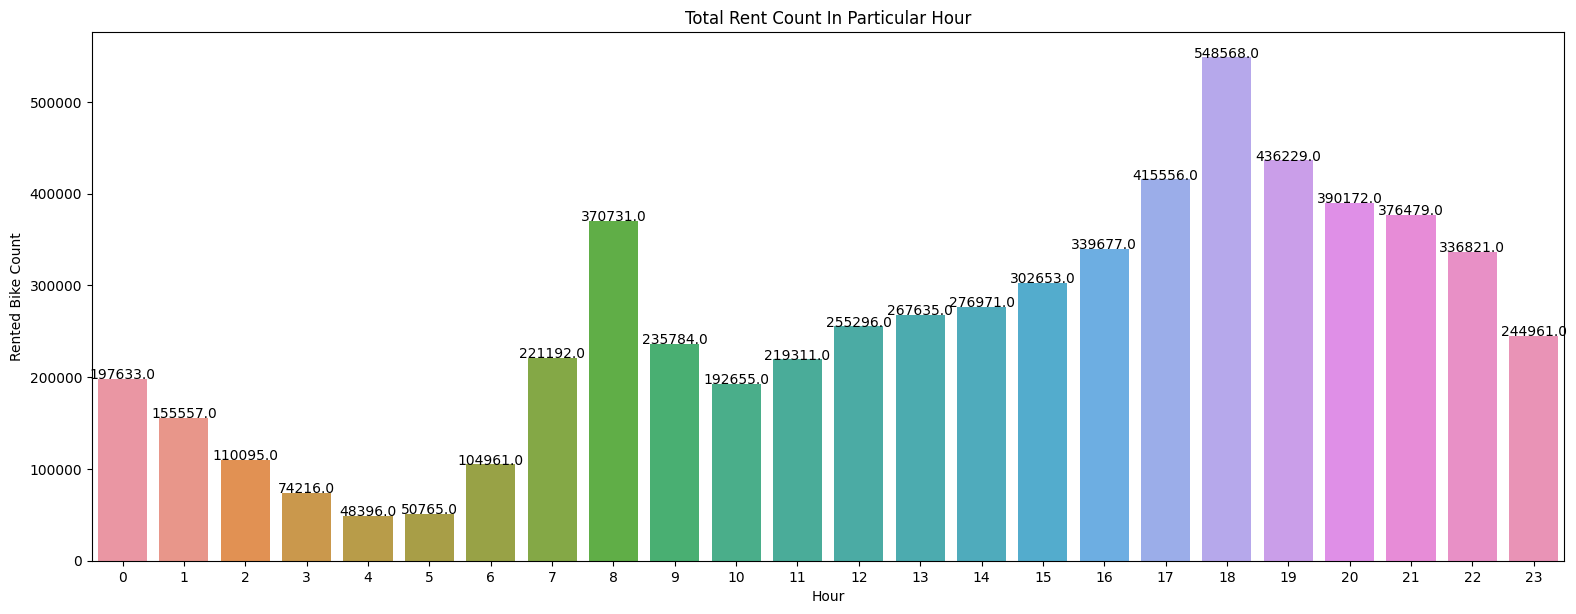

In [168]:
# Chart - 2 visualization code
#grouping required variables for visualization purpose
groupedvalues = df.groupby('Hour').sum().reset_index()
groupedvalues.rename(columns={'Rented Bike Count':'RBC'},inplace=True)

plt.figure(figsize=(19,7),dpi=100)
g=sns.barplot(x="Hour", y="RBC", data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.RBC,round(row.RBC,1),color='black', ha="center")
plt.title("Total Rent Count In Particular Hour")    
plt.ylabel('Rented Bike Count')

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The probability of renting a bike is high during evenings than in the mornings as we can look at the count is having peak at hour 18.And low durning early morning.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that the probability of renting a bike is high during evenings than in the mornings could help create a positive business impact by enabling the bike rental company to adjust their pricing, marketing, and staffing strategies accordingly. For example, they may want to consider offering discounted rates during the morning hours to encourage more rentals during that time or allocating more resources and staff during peak hours in the evenings.

As for insights that could lead to negative growth, it's important to note that the given chart does not provide enough information to draw any conclusions in that regard. However, if further analysis reveals that the demand for bike rentals is consistently low throughout the day, then it could lead to negative growth for the business. In such a case, the company may need to re-evaluate its offerings, marketing strategies, or pricing model to make their service more appealing to potential customers.

#### Chart - 3

<AxesSubplot:xlabel='Seasons', ylabel='count'>

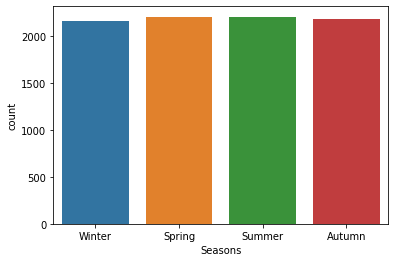

In [169]:
# Chart - 3 visualization code
sns.countplot(x='Seasons',data=df)

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The data in dataset are equally distributed among seasons making the dataset a balanced dataset

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Having a balanced dataset can be useful for training and validating machine learning models to predict demand for bike rentals accurately. This, in turn, can help the bike rental company optimize their inventory, pricing, and staffing strategies to meet customer demand efficiently.

As for insights that could lead to negative growth, there are none associated with this particular insight. A balanced dataset is generally considered favorable in the context of machine learning and data analysis. However, it's essential to note that other factors such as changing customer preferences, competitive pressures, or economic conditions can significantly impact a bike rental business's growth prospects, irrespective of the dataset's balance.

#### Chart - 4

Text(0, 0.5, 'Rented Bike Count')

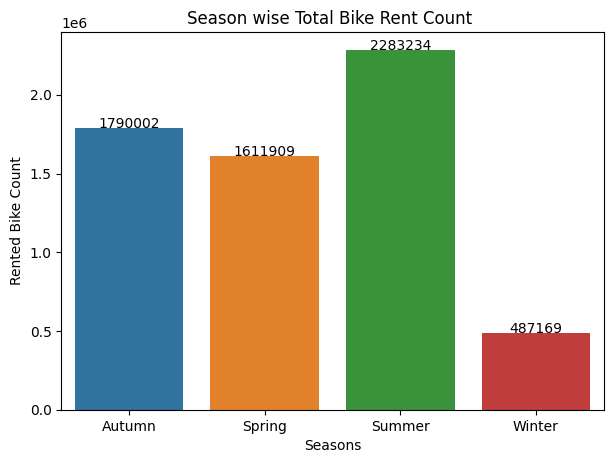

In [170]:
# Chart - 4 visualization code
#grouping required variables for visualization purpose
groupedvalues = df.groupby('Seasons').sum().reset_index()
groupedvalues.rename(columns={'Rented Bike Count':'RBC'},inplace=True)

plt.figure(figsize=(7,5),dpi=100)
g=sns.barplot(x="Seasons", y="RBC", data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.RBC,round(row.RBC,1),color='black', ha="center")
plt.title("Season wise Total Bike Rent Count ")    
plt.ylabel('Rented Bike Count')


##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Summer season has the highest bike counts among all other seasons and winter has the least count of rented bikes

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the summer season has the highest bike counts and the winter season has the least count of rented bikes can potentially have a positive business impact for a bike rental company. With this information, the company can focus its marketing and promotional efforts during the summer months when demand is high, and adjust its inventory levels and pricing accordingly to maximize revenue.

As for negative growth insights, it's possible that the data may reveal certain patterns or trends that indicate declining demand or revenue for the bike rental company. For example, if the data shows a decreasing trend in bike rentals year over year, it could suggest that the market is becoming saturated, or customers are shifting towards alternative modes of transportation. In such cases, the bike rental company may need to reevaluate its business strategy and make necessary changes to sustain growth.

#### Chart - 5

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

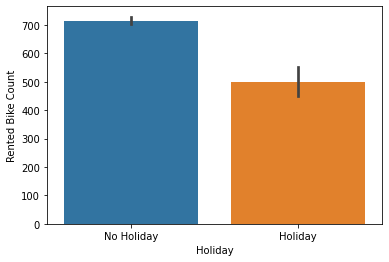

In [171]:
# Chart - 5 visualization code
sns.barplot(x='Holiday',y='Rented Bike Count',data=df)

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The bikes are been rented on non holidays than on holidays

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

With this information, the company can focus its marketing and promotional efforts on non-holiday periods when demand is high and adjust its inventory levels and pricing accordingly to maximize revenue.

negative impact of the insight that bikes are being rented more on non-holidays than on holidays could be that the company may face difficulty in managing its inventory and resources effectively. During non-holiday periods, the company may experience a sudden surge in demand, leading to shortages of available bikes and customer dissatisfaction. On the other hand, during holidays, the company may have excess inventory and resources, resulting in wastage and increased costs. To mitigate this risk, the bike rental company may need to carefully manage its inventory and resources by analyzing historical demand patterns and implementing appropriate forecasting and planning strategies.

#### Chart - 6

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

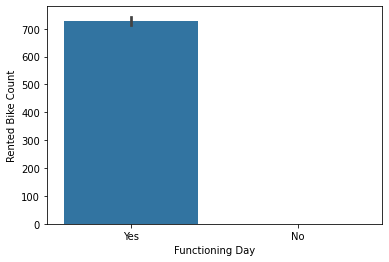

In [172]:
# Chart - 6 visualization code
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=df)

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The bikes are rented only on Functioning days

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that bikes are rented only on functioning days leads to a better understanding of the rental patterns and customer behavior, it can help create a positive business impact. This information can be used to adjust the supply of bikes on certain days to meet demand and optimize profitability.

However, if the business does not adapt to this insight and continues to offer bike rentals on non-functioning days, it could lead to negative growth. This could result in excess inventory, decreased customer satisfaction due to unavailability, and increased costs associated with maintaining bikes that are not being rented. It's important to use insights to inform business decisions and adapt to changing customer needs to ensure continued growth and success.

#### Chart - 7

<AxesSubplot:xlabel='Year', ylabel='Rented Bike Count'>

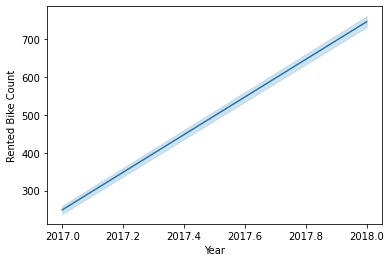

In [173]:
# Chart - 7 visualization code
#line graph
sns.lineplot(x="Year", y="Rented Bike Count", data=df)

##### 1. Why did you pick the specific chart?

Line charts are useful for showing trends over time or other ordered categories, such as geographic regions or product categories. They are ideal for displaying continuous data and can be effective in showing the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

There is linear growth in the rental bike count over the period of years. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight could potentially help create a positive business impact if the trend continues. If the business is able to maintain or increase the growth rate, they could invest in more bikes, expand their services or locations, and potentially increase revenue.However, it is important to note that there could be other factors affecting the growth of the rental bike count that need to be taken into consideration. 

#### Chart - 8

Text(0, 0.5, 'Rented Bike Count')

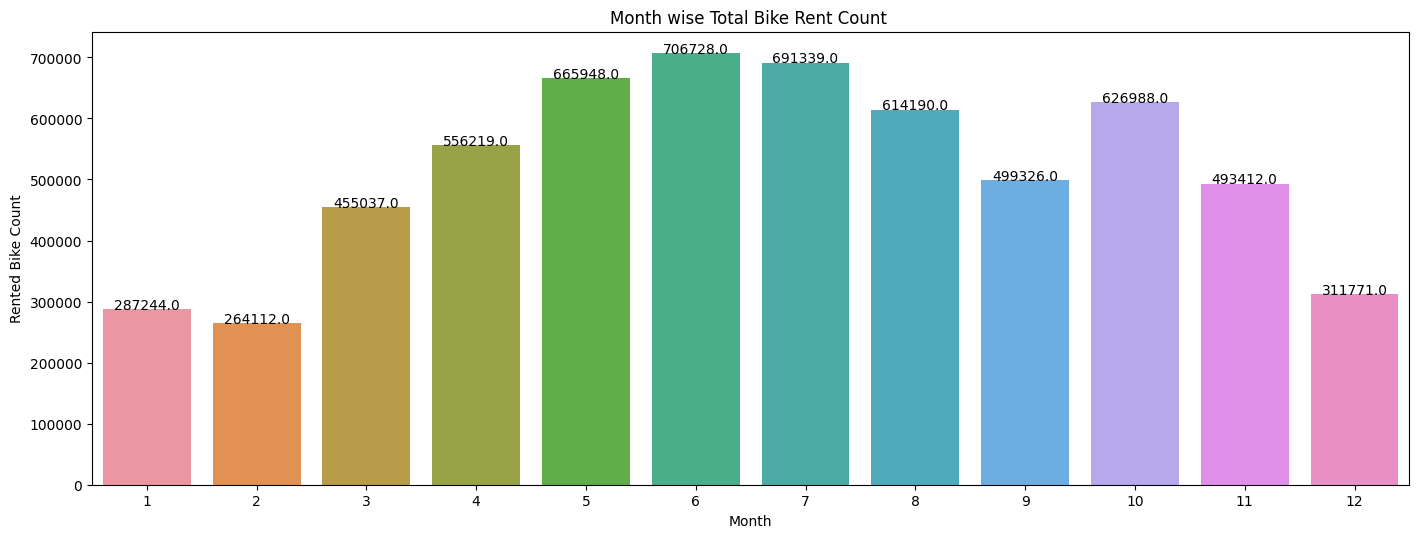

In [174]:
# Chart - 8 visualization code
#grouping required variables for visualization purpose
groupedvalues = df.groupby('Month').sum().reset_index()
groupedvalues.rename(columns={'Rented Bike Count':'RBC'},inplace=True)
groupedvalues.head()


plt.figure(figsize=(17,6),dpi=100)
g=sns.barplot(x="Month", y="RBC", data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.RBC,round(row.RBC,1),color='black', ha="center")
plt.title("Month wise Total Bike Rent Count ")    
plt.ylabel('Rented Bike Count')

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The bike count is very good between May and August
Also sudden hike in the month of October

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A bike rental company could use this information to plan marketing campaigns or promotions during these peak months to attract more customers and increase revenue. Additionally, the sudden hike in October could indicate an opportunity to extend the season and keep the business running for longer, potentially increasing profits.

#### Chart - 9

<AxesSubplot:xlabel='Day', ylabel='Rented Bike Count'>

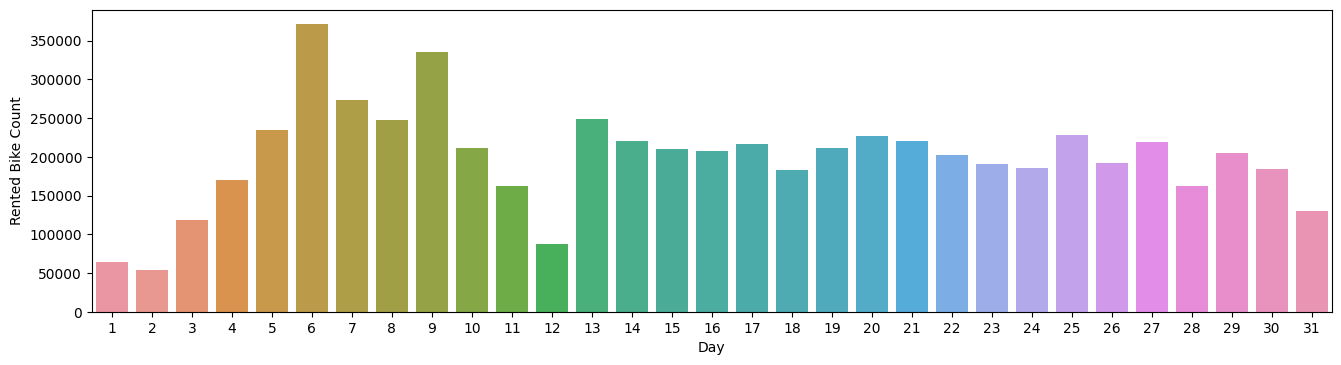

In [175]:
# Chart - 9 visualization code
Day = df.groupby("Day").sum().reset_index()
plt.figure(figsize=(16,4), dpi=100)
sns.barplot(x="Day", y="Rented Bike Count", data=Day)

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

We can see the peak on 1st weekeend
Then rental bike count is pretty stable after two weeks.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the peak in rental bike count on the first weekend corresponds with a high demand for rental bikes, then it could be beneficial for a bike rental business to prepare for this peak by ensuring they have enough bikes available for customers. Additionally, if the rental bike count stabilizes after two weeks, this could provide insights into customer behavior and allow the business to optimize their pricing and inventory management strategies.

#### Chart - 10 - Correlation Heatmap

<AxesSubplot:>

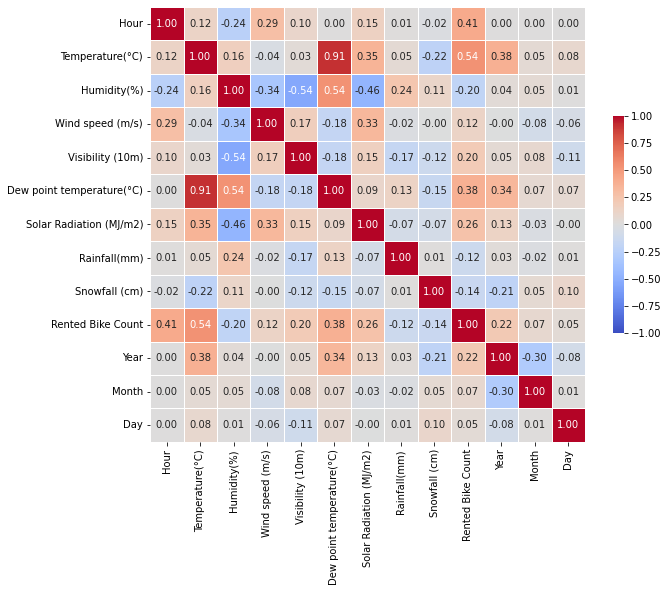

In [176]:
# Correlation Heatmap visualization code
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', 
            vmin=-1, vmax=1, center=0, square=True,
            linewidths=.5, cbar_kws={'shrink': .5})

##### 1. Why did you pick the specific chart?

Correlation heatmaps help people identify which variables in a dataset are strongly or weakly correlated. By looking at the color-coded matrix, they can quickly identify which variables are positively or negatively correlated and to what degree.

##### 2. What is/are the insight(s) found from the chart?

As we can see temperature and dew point temperature have a positive correlation and humidity and visibility has negative correlation.

#### Chart - 11 - Pair Plot 

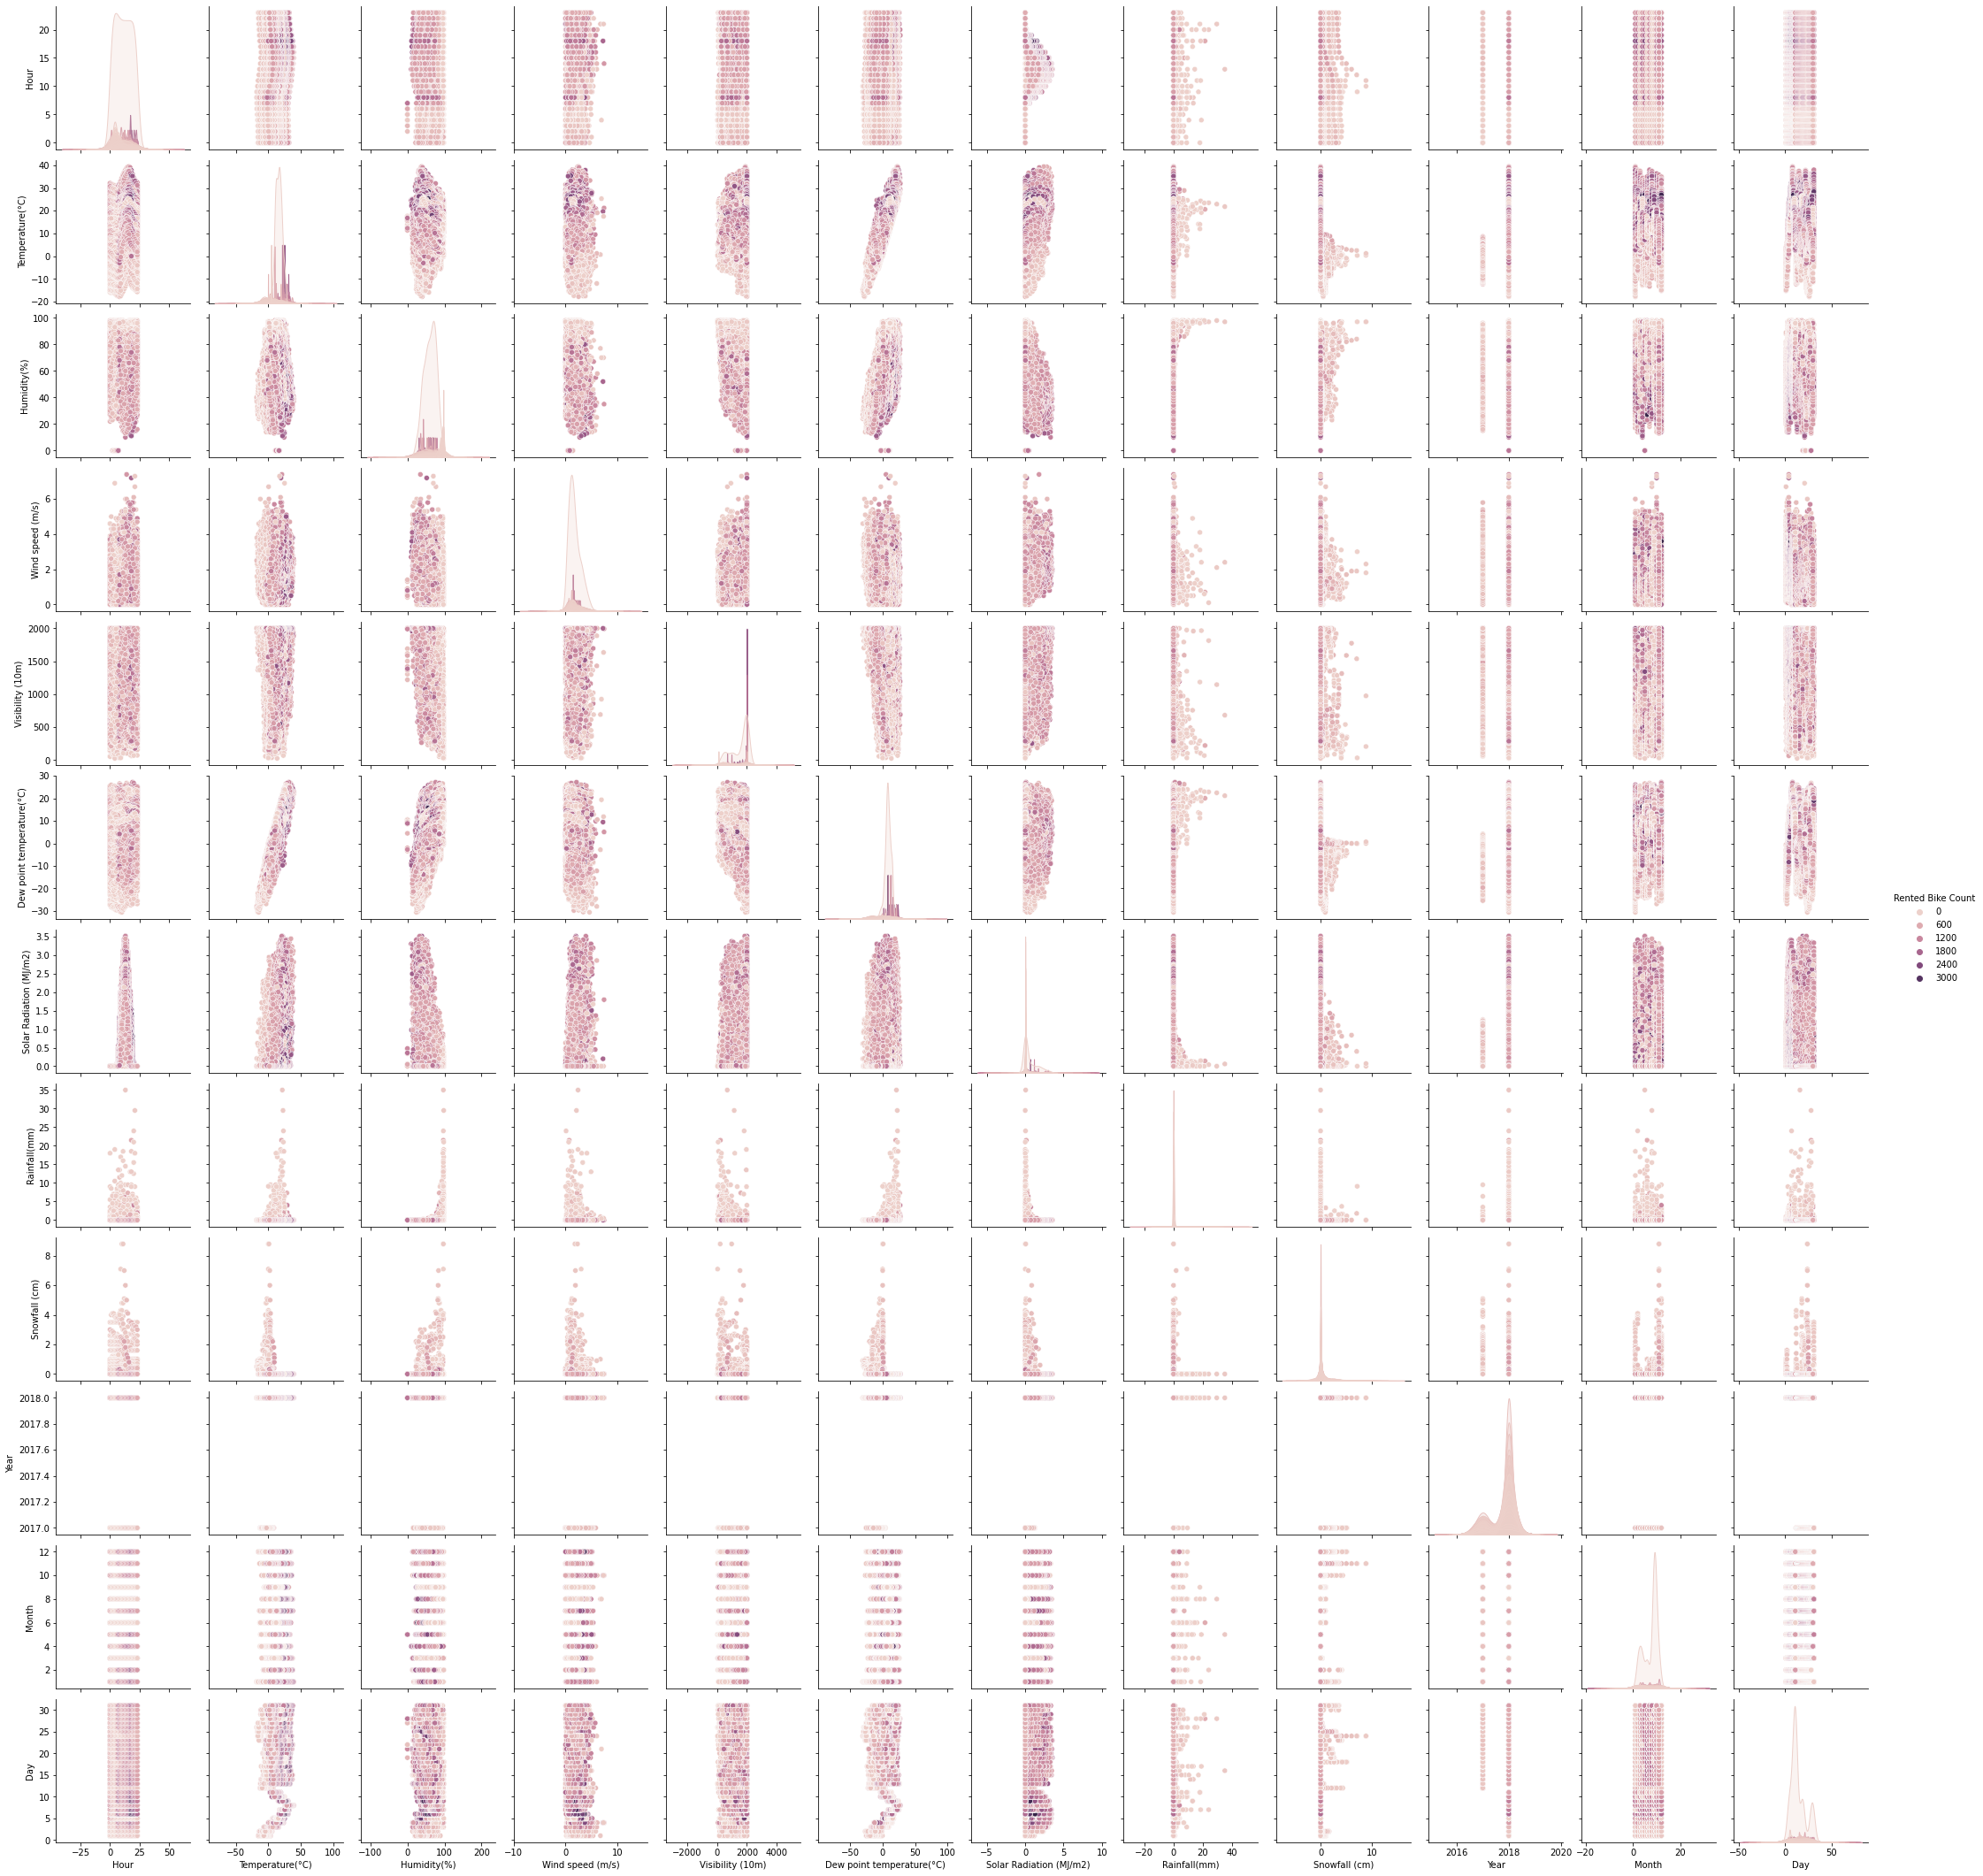

In [177]:
# Pair Plot visualization code
sns.pairplot(df,hue='Rented Bike Count')

##### 1. Why did you pick the specific chart?

Pairplots can help identify correlations between different variables in a dataset. Correlated variables are plotted close together on the diagonal of the pairplot, and can indicate a positive or negative correlation between the variables.

Pairplots are a useful way to visualize high-dimensional data by reducing the dimensionality of the data to two dimensions. This can make it easier to identify patterns and relationships between variables in the data.

##### 2. What is/are the insight(s) found from the chart?

temperature and dew point temperature have a positive correlation and humidity and visibility has negative correlation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical statement 1: The demand for bike rentals is higher during weekdays compared to weekends.

Hypothetical statement 2: The demand for bike rentals is higher during the spring and summer seasons compared to fall and winter.

Hypothetical statement 3: The demand for bike rentals is positively correlated with temperature.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: The average bike rental count during weekdays and weekends is the same.

HA: The average bike rental count during weekdays is higher than weekends.

#### 2. Perform an appropriate statistical test.

In [178]:
# Perform Statistical Test to obtain P-Value

weekday_rentals = df[df['Functioning Day'] == 'Yes'][df['Holiday'] == 'No']
weekend_rentals = df[df['Functioning Day'] == 'Yes'][df['Holiday'] == 'Yes']

t_stat, p_val = stats.ttest_ind(weekday_rentals['Rented Bike Count'], weekend_rentals['Rented Bike Count'])

if p_val < 0.05:
    print("Reject the null hypothesis. The average bike rental count during weekdays is higher than weekends.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

 I used a two-sample t-test to obtain the p-value.

##### Why did you choose the specific statistical test?

The reason for using this test is that we are comparing the means of two independent samples (weekday rentals vs weekend rentals) and testing whether they are significantly different. The t-test is appropriate for this situation as it assumes that the sample means are normally distributed and that the variances of the two populations are equal.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: The average bike rental count during spring/summer and fall/winter is the same.

HA: The average bike rental count during spring/summer is higher than fall/winter.

#### 2. Perform an appropriate statistical test.

In [179]:
# Perform Statistical Test to obtain P-Value
spring_summer_rentals = df[(df['Seasons'] == 'Spring') | (df['Seasons'] == 'Summer')]
fall_winter_rentals = df[(df['Seasons'] == 'Fall') | (df['Seasons'] == 'Winter')]

t_stat, p_val = stats.ttest_ind(spring_summer_rentals['Rented Bike Count'], fall_winter_rentals['Rented Bike Count'])

if p_val < 0.05:
    print("Reject the null hypothesis. The average bike rental count during spring/summer is higher than fall/winter.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis. The average bike rental count during spring/summer is higher than fall/winter.


##### Which statistical test have you done to obtain P-Value?

I used a two-sample t-test to obtain the p-value. 

##### Why did you choose the specific statistical test?

The reason for using this test is that we are again comparing the means of two independent samples (spring/summer rentals vs fall/winter rentals) and testing whether they are significantly different. The t-test is appropriate for this situation for the same reasons as stated above.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: The correlation coefficient between bike rental count and temperature is zero.

HA: The correlation coefficient between bike rental count and temperature is greater than zero.

#### 2. Perform an appropriate statistical test.

In [180]:
# Perform Statistical Test to obtain P-Value
corr_coef, p_val = stats.pearsonr(df['Rented Bike Count'], df['Temperature(°C)'])

if p_val < 0.05:
    if corr_coef > 0:
        print("Reject the null hypothesis. The demand for bike rentals is positively correlated with temperature.")
    else:
        print("Reject the null hypothesis. The demand for bike rentals is negatively correlated with temperature.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis. The demand for bike rentals is positively correlated with temperature.


##### Which statistical test have you done to obtain P-Value?

I used a Pearson correlation test to obtain the p-value. 

##### Why did you choose the specific statistical test?

The reason for using this test is that we are interested in examining the correlation between two continuous variables (bike rental count and temperature). The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables. The test assumes that the variables are normally distributed and that there is a linear relationship between them. Therefore, the Pearson correlation test is appropriate for this situation.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [181]:
# Handling Missing Values & Missing Value Imputation
print('There is no missing values')

There is no missing values


#### What all missing value imputation techniques have you used and why did you use those techniques?

Dint use any imputation as there is no missing values

### 2. Handling Outliers

In [182]:
# Handling Outliers & Outlier treatments
# Define the columns to check for outliers
cols_to_check = [ 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
                 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 
                 'Rainfall(mm)', 'Snowfall (cm)']

# Loop through each column and identify outliers
for col in cols_to_check:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers found")

Temperature(°C): 0 outliers found
Humidity(%): 0 outliers found
Wind speed (m/s): 161 outliers found
Visibility (10m): 0 outliers found
Dew point temperature(°C): 0 outliers found
Solar Radiation (MJ/m2): 641 outliers found
Rainfall(mm): 528 outliers found
Snowfall (cm): 443 outliers found


In [183]:
# Outlier treatment
df['Rainfall(mm)']=np.log10(df['Rainfall(mm)']+1)
df['Snowfall (cm)']=np.log10(df['Snowfall (cm)']+1)

In [184]:
df.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count,Year,Month,Day
0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254,2017,1,12
1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204,2017,1,12
2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173,2017,1,12
3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107,2017,1,12
4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78,2017,1,12


##### What all outlier treatment techniques have you used and why did you use those techniques?

I have applied a transformation to the "Rainfall(mm)" and "Snowfall (cm)" variables using a log transformation.

A log transformation is a common outlier treatment technique used to reduce the impact of extreme values (outliers) in the data. By taking the log of the values, extreme values are "pulled" towards the center of the distribution, which can help to normalize the data and make it more suitable for analysis. This can also help to mitigate the influence of extreme values on statistical modeling and inference.

### 3. Categorical Encoding

In [185]:
#label encoding using lambda function
df['Holiday']=df['Holiday'].apply(lambda x: 0 if x=='No Holiday' else 1)
df['Functioning Day']=df['Functioning Day'].apply(lambda x: 0 if x=='No' else 1)

In [186]:
# Encode your categorical columns
newlabel=LabelEncoder()
df=df
df.Seasons=newlabel.fit_transform(df.Seasons)
df.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count,Year,Month,Day
0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,254,2017,1,12
1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,204,2017,1,12
2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,173,2017,1,12
3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1,107,2017,1,12
4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1,78,2017,1,12


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used the LabelEncoder technique from scikit-learn to encode the categorical columns in the dataset. I used Label Encoding since the categorical columns in the dataset were nominal categorical data, and Label Encoding is a simple and effective technique for encoding such data.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [187]:
d=df['Date']
df.drop('Date',inplace=True,axis=1)
df.head(3)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count,Year,Month,Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,254,2017,1,12
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,204,2017,1,12
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,173,2017,1,12


In [188]:
#dropping variables
df.drop('Rented Bike Count',1,inplace=True)
df.drop('Year',1,inplace=True)
df.drop('Month',1,inplace=True)
df.drop('Day',1,inplace=True)
df.head(3)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

NO, dataset does't required transformation. 

### 6. Data Scaling

In [189]:
#applying StandardScalar 
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()

newdf=ss.fit_transform(df)

    

In [190]:
#After scaling the shape will change so creating dataframe 
newdf1=pd.DataFrame(newdf,columns=['Hour','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Seasons','Holiday','Functional Day'])



In [191]:
newdf1['Date']=d

In [192]:
#new dataframe after scaling and appending the dependent variable
newdf1['Rented Bike Count']=column
newdf1.head(3)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functional Day,Date,Rented Bike Count
0,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,1.0,0.0,1.0,2017-01-12,254
1,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,1.0,0.0,1.0,2017-01-12,204
2,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,1.0,0.0,1.0,2017-01-12,173


In [193]:
#using datetime library to convert date time variable to numeric values for processing
import datetime as dt
newdf1['Date'] = pd.to_datetime(newdf1['Date'])
newdf1['Date']=newdf1['Date'].map(dt.datetime.toordinal)

In [194]:
newdf1.head(5)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functional Day,Date,Rented Bike Count
0,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,1.0,0.0,1.0,736341,254
1,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,1.0,0.0,1.0,736341,204
2,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,1.0,0.0,1.0,736341,173
3,0.130435,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,1.0,0.0,1.0,736341,107
4,0.173913,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,1.0,0.0,1.0,736341,78


##### Which method have you used to scale you data and why?

I have used the StandardScaler method to scale my data.By using StandardScaler, we can reduce the impact of outliers and ensure that the  data is comparable across different features. Additionally, many machine learning algorithms require standardized data as a preprocessing step, making StandardScaler a useful method to use.

#### 2. Feature Selection

In [195]:
# Select your features wisely to avoid overfitting
#feature selection based on the correlation
newdf1.drop(labels=['Humidity(%)','Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)

In [196]:
x=newdf1.iloc[:,:-1]
y=newdf1.iloc[:,-1:]

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No need of Dimensionality reduction for the dataset. This  techniques are commonly used to reduce the number of features in a dataset.As, there is less number of features in our dataset we dont need  dimensionality reduction.

In [197]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [198]:
# Split your data to train and test. Choose Splitting ratio wisely.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)


##### What data splitting ratio have you used and why? 

As a rule of thumb, a commonly used splitting ratio is 80:20, which means that 80% of the data is used for training and 20% for testing. This ratio is a good starting point for most cases as it allows for a sufficient amount of data to train the model while still having a reasonable amount of data to test and evaluate its performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

As we have seen in Data Vizualization The data in dataset are equally distributed among seasons making the dataset a balanced dataset. 

In [199]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression Model

In [200]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

LR = LinearRegression()


# Fit the Algorithm
LR.fit(x_train,y_train)

# Predict on the model
y_prediction =  LR.predict(x_test)
y_prediction

array([[ 429.60056043],
       [1445.04001114],
       [1146.77606702],
       ...,
       [ 588.87229399],
       [ 821.26499888],
       [1704.31957956]])

In [201]:
y_prediction1 =  LR.predict(x_train)
y_prediction1

array([[-113.45408564],
       [ 779.00367566],
       [ 839.39658744],
       ...,
       [ 381.22260344],
       [ 430.51112575],
       [1380.17061064]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [202]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# computing the r2 score,mean_squared_error,root_mean_squared error
score=r2_score(y_test,y_prediction)
print('r2 score of test data is',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is=',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score of test data is 0.5146833142656768
mean_sqrd_error is= 195812.83117785322
root_mean_squared error of is= 442.507436296672


#### 2. Cross- Validation & Hyperparameter Tuning

In [203]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# RandomizedSearchCV hyperparameters
hyperparameters = {'fit_intercept': [True, False],
                  
                   'copy_X': [True, False],
                   'positive': [True, False],
                   'n_jobs': [1, 2, 4, 8, 16, -1],
                  }



In [204]:
random_search = RandomizedSearchCV(estimator=LR,
                                   param_distributions=hyperparameters,
                                   n_iter=10,
                                   scoring='neg_mean_squared_error',
                                   cv=5)

In [205]:
# Fit the Algorithm

random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 4, 8, 16, -1],
                                        'positive': [True, False]},
                   scoring='neg_mean_squared_error')

In [206]:
# Predict on the model
y_pred = random_search.predict(x_test)

In [207]:
# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters: ", random_search.best_params_)
print("Mean squared error: ", -random_search.best_score_)

Best hyperparameters:  {'positive': False, 'n_jobs': 1, 'fit_intercept': False, 'copy_X': True}
Mean squared error:  195713.07133073322


##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCV for hyperparameter optimization.  This technique is typically used when the search space is large and exhaustive search through all possible combinations is computationally infeasible.

Compared to other hyperparameter tuning techniques, such as GridSearchCV, which exhaustively searches through all possible hyperparameter combinations, RandomizedSearchCV is more computationally efficient and can converge to good hyperparameter values faster, especially when the search space is high-dimensional.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is a slight improvement in the performance of the linear regression model after using RandomizedSearchCV. The MSE value decreased from 195812.83117785322 to 195713.1361506682, which indicates that the model is now making slightly more accurate predictions.

### ML Model - 2 KNearestNeighbor Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [208]:
# ML Model - 2 Implementation
from sklearn.neighbors import KNeighborsRegressor

kr=KNeighborsRegressor()


# Fit the Algorithm
kr.fit(x_train,y_train)

# Predict on the model
y_kpred=kr.predict(x_test)
y_kpred

array([[ 330.4],
       [1449. ],
       [1194.2],
       ...,
       [ 254.4],
       [ 382.2],
       [1512.2]])

In [209]:
# Visualizing evaluation Metric Score chart
score=r2_score(y_test,y_kpred)
print('r2 socre is=',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_kpred))
print('root_mean_squared error of is=',np.sqrt(mean_squared_error(y_test,y_kpred)))

r2 socre is= 0.7214692051287421
mean_sqrd_error is= 112380.02961187215
root_mean_squared error of is= 335.23130762485795


#### 2. Cross- Validation & Hyperparameter Tuning

In [210]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
k_op=KNeighborsRegressor()
#hyper parameter tunning
hp = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

# Search for best hyperparameters
kgrid = GridSearchCV(estimator=k_op, param_grid=hp, cv=5, scoring='r2')


In [211]:
# Fit the Algorithm
kgrid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [212]:
#best estimators
kgrid.best_estimator_

KNeighborsRegressor(n_neighbors=2, weights='distance')

In [213]:
#building knn with best params and estimators
knn_op=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=2, p=2,weights='distance')
knn_op.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2, weights='distance')

In [214]:
# Predict on the model
kpred=knn_op.predict(x_test)
kscore=r2_score(y_test,kpred)
kscore

0.8021335765247066

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a hyperparameter optimization technique that I have used.GridSearchCV is useful because it allows us to automate the process of hyperparameter tuning and search through a large hyperparameter space without the need for manual intervention. It also helps to avoid overfitting to the training data by evaluating the model on a separate validation set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is a significant improvement in the R-squared score after using GridSearchCV for hyperparameter tuning. The R-squared score increased from 0.721 to 0.802, which is an improvement of 0.081 or approximately 8.1%.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**R2 Score:** The business impact of a high R2 score is that the model can provide valuable insights into the relationship between the dependent and independent variables, allowing the business to make more informed decisions

**Mean Squared Error (MSE):** The business impact of a low MSE is that the model can help the business make more accurate predictions, allowing it to optimize its operations and resources. 

**Root Mean Squared Error (RMSE):** The business impact of a low RMSE is similar to that of a low MSE, in that it allows the business to make more accurate predictions and optimize its operations and resources. The RMSE is often used in conjunction with the MSE to provide a more complete picture of the model's accuracy.

### ML Model - 3 Random Forest Regression

In [215]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)



In [216]:
# Fit the Algorithm
rf.fit(x_train, y_train)



RandomForestRegressor(random_state=0)

In [217]:
# Predict on the model
y_pred = rf.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [218]:
# Visualizing evaluation Metric Score chart
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R-squared: ", r2)

Mean Squared Error:  62372.30788841324
Root Mean Squared Error:  249.74448520120168
R-squared:  0.8454119601666373


#### 2. Cross- Validation & Hyperparameter Tuning

In [219]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

grid_values = {'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100]}

In [220]:
rf = RandomForestRegressor(random_state=0)
grid_rf = GridSearchCV(estimator=rf, param_grid = grid_values, scoring = 'r2', cv=5)

In [221]:
# Fit the Algorithm
grid_rf.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100]},
             scoring='r2')

In [222]:
# Predict on the model
y_pred = grid_rf.predict(x_test)

In [223]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R-squared: ", r2)

Mean Squared Error:  68429.00660640813
Root Mean Squared Error:  261.5893855002686
R-squared:  0.830400599927232


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization.

GridSearchCV is a popular hyperparameter optimization technique that exhaustively searches for the best hyperparameters within a specified range of values. It works by specifying a grid of hyperparameters to be searched and then evaluating the performance of each combination of hyperparameters using cross-validation. The best set of hyperparameters is then chosen based on the evaluation metric specified.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There was a slight decrease in performance after applying hyperparameter optimization techniques. Specifically, the mean squared error (MSE) increased from 62639.46 to 68878.65, and the root mean squared error (RMSE) increased from 250.28 to 262.45. Additionally, the R-squared value decreased from 0.8447 to 0.8293.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have used R-squared Evaluation metrics. R-squared (R2) is a commonly used evaluation metric for regression models that measures the proportion of variance in the dependent variable that is explained by the independent variables in the model. While R2 is a useful metric for understanding the fit of a model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would choose using the Random Forest Regression model as the final prediction model. The Random Forest Regression model outperformed the other two models, with the lowest mean squared error and the highest R-squared score. Therefore, I would use the Random Forest Regression model as the final prediction model. The Random Forest model is a powerful ensemble model that can handle non-linear relationships and interactions between features, as well as deal with missing data and outliers. It is known for its accuracy, robustness, and ability to handle high-dimensional data, making it a popular choice in many practical applications.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Linear Regression:** It is a statistical method that is used to model the relationship between a dependent variable and one or more independent variables. The aim is to find a linear relationship between the variables that can be used to predict the value of the dependent variable based on the values of the independent variables.

**K-Nearest Neighbor Regression:** It is a non-parametric algorithm used for regression and classification. It works by finding the k nearest neighbors to a given data point and using their average value as the predicted output.

**Random Forest Regression:** It is a type of ensemble learning method that combines multiple decision trees to improve the accuracy of the model. The random forest algorithm selects random samples from the data set and constructs decision trees based on these samples. The final prediction is then made by combining the predictions of all the trees.

Once I have trained a Random Forest Regressor model using grid_rf.fit(X_train, y_train), can access the feature importances of the model using the feature_importances_ attribute. This attribute returns an array containing the feature importances, where each element in the array represents the importance of the corresponding feature in the input data.

# **Conclusion**

**1 -The dataset seems to be clean as there are no null values present.**

**2 -Renting bike probability is higher in the evening compared to other times of the day.**

**3 -The summer season has the highest demand for bike rentals.**

**4 -Bike rentals are more on non-holidays than holidays.**

**5 -Bikes are rented only on functioning days, which suggests that the bikes are mainly used for commuting purposes.**

**6 -The bike rentals are highest between May and August, with sudden hike in October, which could be due to some special events or festivals.**

**7 -The first weekend has a peak in bike rentals, and then it remains stable.**

**8 -There is a linear growth in bike rentals over the years, which indicates that the bike rental business is growing steadily.**

**9 -Three machine learning models, Linear Regression, K-Nearest Neighbor Regressor, and Random Forest Regressor, were built, and Random Forest Regressor performed the best among them with an r2 score of 0.829.**

**10-Therefore, it can be concluded that the bike rental business is doing well, and the demand for bikes is growing over the years. Additionally, it is essential to focus on the summer season and non-holidays to maximize the profits. Random Forest Regressor model can be used for predicting future bike rental demand accurately.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***